In [1]:
import os
os.chdir('/Users/mac/Desktop/Work Space/Safe PM 2')

In [2]:
from datamanager import DataManager
from trainer import Trainer
from tester import Tester
from viz import Viz

import numpy as np
import torch
import utils

np.random.seed(1)
torch.manual_seed(1)
utils.SAVE_DIR += f"/seed{1}"

In [3]:
train_start = "2014-01-02"
train_end = "2020-12-31"
test_start = "2020-12-31"
test_end = "2021-12-31"

paths = ["Data/" + s for s in ["REGN", "TIGO"]]
datamanager = DataManager(paths, train_start, train_end, test_start, test_end)
train_data_tensor, test_data_tensor = datamanager.get_data_tensor()

K = train_data_tensor.shape[2]
F = train_data_tensor.shape[1]-1

In [4]:
parameters = {
            "lr1":1e-4, 
            "lr2":1e-3, 
            "tau":0.005, 
            "delta":0., 
            "alpha":1.0,
            "gamma":0.9,
            "K":K, "F":F, 
            "fee":0.0, 
            "term":40,
            "freq":50000,
            "cons":True,
            "balance":12000, 
            "episode":500,
            "min_trading_price":0,
            "max_trading_price":400,
            "batch_size":128,
            "memory_size":10000
            }

In [5]:
trainer = Trainer(**parameters, data=train_data_tensor)
trainer.train()
trainer.save_model(utils.SAVE_DIR + "/net.pth")

epi:0
cum cost:51
cum reward:1652.9939084340003
score r:1652.9939084340003
score c:51.0
cushion:0.11140597919577067
a:[ 0.09251725 -0.34262913]
c:0
alpha:tensor([[6.1364, 7.8657, 7.7803]])
log prob:1.638132095336914
value:tensor([[3.9420]])
const:0.28030578623189867
lam:0
lam_grad:0.7196942137681013
cum_fee:0.0
portfolio:[0.46421422 0.2826829  0.25310289]
profitloss:61.501234867351975
loss:-0.3963586091995239

epi:1
cum cost:669
cum reward:1510.8710750562548
score r:1581.9324917451277
score c:360.0
cushion:0.06546771594142742
a:[-0.16359848  0.16848359]
c:0
alpha:tensor([[6.5847, 8.8906, 9.4410]])
log prob:2.6750659942626953
value:tensor([[6.6747]])
const:3.8154043685231005
lam:0.014325612951825908
lam_grad:-2.8154043685231005
cum_fee:0.0
portfolio:[0.29188535 0.29597366 0.41214099]
profitloss:65.16038221074298
loss:-0.04516221582889557

epi:2
cum cost:150
cum reward:1685.7393275939069
score r:1616.5347703613872
score c:290.0
cushion:0.09626321412416905
a:[-0.31249587  0.11820046]
c:0


In [ ]:
tester = Tester(**parameters, data=test_data_tensor)
tester.test(utils.SAVE_DIR + "/net.pth")

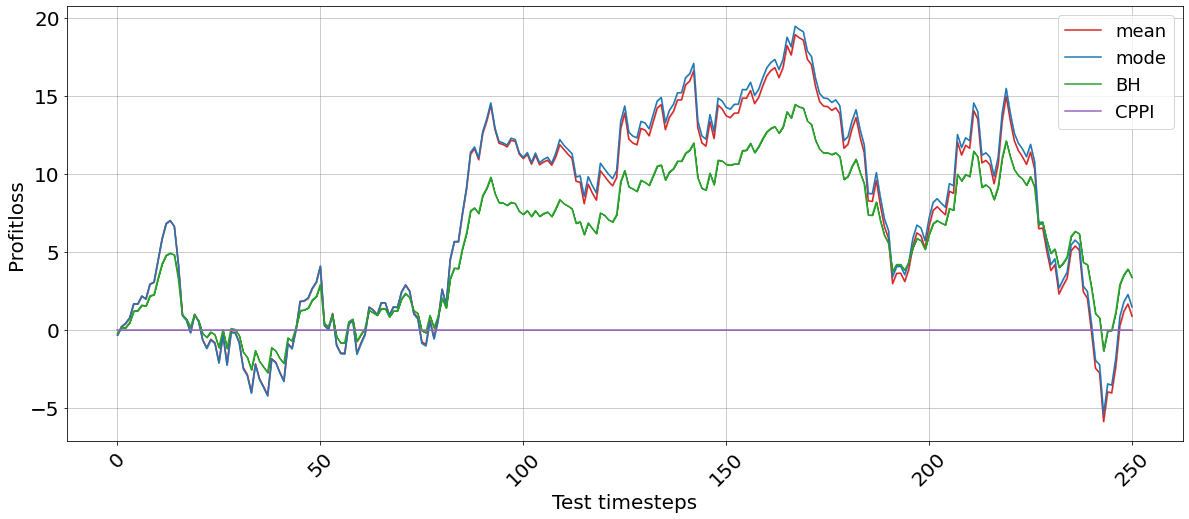

mean profitloss: 0.8701618251240717
mode profitloss: 1.461760065799722
BH profitloss: 3.3501729014281167
CPPI profitloss: 0.0


In [7]:
viz = Viz()
viz.show(1,1, size=(20,8))